In [7]:
import pandas as pd 

df=pd.read_csv('transfer_window_Mat.csv', sep=';')


In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [9]:
#data preparation club two sided barchart
in_transfer=df.groupby(by=["club_to"]).sum(['fee'])
in_transfer=in_transfer.rename(columns={"fee": "expenditure"})
in_transfer['id']=in_transfer.index

out_transfer=df.groupby(by=["club_from"]).sum(['fee'])
out_transfer['id']=out_transfer.index
out_transfer=out_transfer.rename(columns={"fee": "revenue"})

balance=out_transfer.merge(in_transfer, how='inner', on='id')
balance=balance.loc[:,['id', 'revenue','expenditure']]
balance['expenditure'] = balance['expenditure']*(-1)

balance=balance.sort_values(by=['expenditure'])
balance_20=balance.head(20)

In [10]:
balance_20

,id,revenue,expenditure
58,Chelsea FC,65500000,-610000000
137,Manchester United,3000000,-241000000
24,Arsenal FC,23000000,-191000000
223,West Ham United,20000000,-191000000
144,Newcastle United,2000000,-183000000
205,Tottenham Hotspur,38500000,-177000000
146,Nottingham Forest,5000000,-175000000
224,Wolverhampton Wanderers,58000000,-172000000
82,FC Barcelona,39000000,-158000000
136,Manchester City,156000000,-150000000


<IPython.core.display.Javascript object>


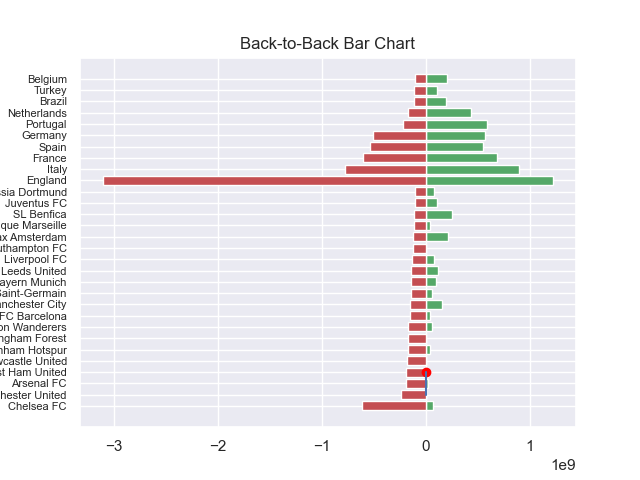

In [11]:
# plot the bars
plt.barh(balance_20['id'], balance_20['revenue'], color = 'g')
plt.barh(balance_20['id'], balance_20['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

In [12]:
#change nation variable
lst=['Italy','England','France', 'Spain','Germany']
for index,row in df.iterrows():
    if row['country_to'] not in lst:
        row['country_to']='Other'
    if row['country_from'] not in lst:
        row['country_from']='Other'

In [13]:
#data preparation nation two sided barchart
in_transfer_n=df.groupby(by=["country_to"]).sum(['fee'])
in_transfer_n=in_transfer_n.rename(columns={"fee": "expenditure"})
in_transfer_n['id']=in_transfer_n.index

out_transfer_n=df.groupby(by=["country_from"]).sum(['fee'])
out_transfer_n['id']=out_transfer_n.index
out_transfer_n=out_transfer_n.rename(columns={"fee": "revenue"})

balance_n=out_transfer_n.merge(in_transfer_n, how='inner', on='id')
balance_n=balance_n.loc[:,['id', 'revenue','expenditure']]
balance_n['expenditure'] = balance_n['expenditure']*(-1)

balance_n=balance_n.sort_values(by=['expenditure'])
balance_20_n=balance_n.head(10)
balance_20_n

,id,revenue,expenditure
10,England,1225500000,-3108250000
16,Italy,897070000,-779180000
11,France,680850000,-604750000
27,Spain,552350000,-537950000
12,Germany,571300000,-505700000
21,Portugal,584300000,-217000000
19,Netherlands,434150000,-176200000
3,Brazil,189890000,-116490000
29,Turkey,101850000,-114670000
2,Belgium,207100000,-107100000


In [14]:
# plot the bars
plt.barh(balance_20_n['id'], balance_20_n['revenue'], color = 'g')
plt.barh(balance_20_n['id'], balance_20_n['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

In [15]:
#Sankey chart

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

ModuleNotFoundError: No module named 'pySankey'

In [16]:
#Sankey chart data 
df_sorted=df.sort_values(by=['fee'], ascending=False)
df_top=df_sorted.head(10)
df_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1230,1,Enzo Fernández,Central Midfield,22,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Chelsea FC,121000000
1229,2,Antony,Right Winger,22,35000000,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95000000
1228,20,Darwin Núñez,Centre-Forward,23,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,80000000
1227,4,Aurélien Tchouameni,Defensive Midfield,22,60000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80000000
1226,3,Wesley Fofana,Centre-Back,21,40000000,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80000000
1225,7,Alexander Isak,Centre-Forward,22,30000000,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,70000000
1224,6,Mykhaylo Mudryk,Left Winger,22,40000000,Ukraine,Premier Liga,Shakhtar Donetsk,England,Premier League,Chelsea FC,70000000
1223,5,Casemiro,Defensive Midfield,30,40000000,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,70000000
1222,8,Matthijs de Ligt,Centre-Back,22,70000000,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67000000
1221,13,Marc Cucurella,Left-Back,24,28000000,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65000000


In [17]:
colorDict = {
    "Bayern Munich": "#ea2f2f",
    "Newcastle United": "#bcbcbc",
    "Real Madrid": "#eeeeee",
    "Liverpool FC": "#f44336",
    "Manchester United": "#cc0000",
    "Chelsea FC":'#0b5394',
    'Enzo Fernández': "#0b5394",
    'Antony': "#cc0000",
    'Darwin Núñez': "#f44336",
    'Aurélien Tchouameni': "#eeeeee",
   'Wesley Fofana': "#0b5394",
    'Alexander Isak': "#bcbcbc",
    'Mykhaylo Mudryk': "#0b5394",
    'Casemiro': "#cc0000",
    'Matthijs de Ligt': "#ea2f2f",
    'Marc Cucurella': "#0b5394"
}


sankey(df_top['club_to'], df_top["name"], colorDict=colorDict,  fontsize=8)
#sankey(df_top['club_from'], df_top["name"], fontsize=8)
#sankey(df_top['league_to'], df_top["name"], fontsize=8)

NameError: name 'sankey' is not defined

<IPython.core.display.Javascript object>


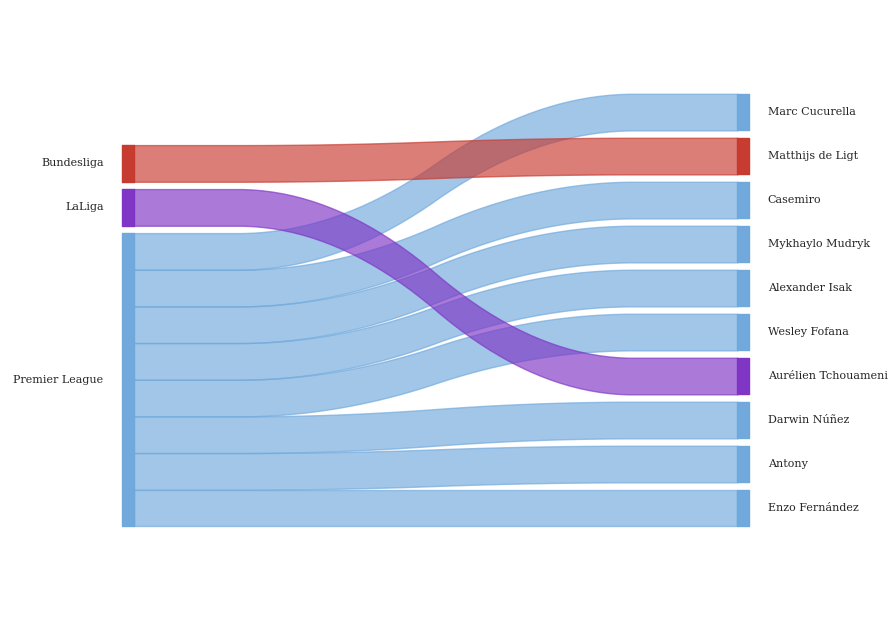

In [13]:
colorDict2 = {
    "Bundesliga": "#c7392e",
    "LaLiga": "#7e33c5",
    "Premier League": "#6fa8dc",
    'Enzo Fernández': "#6fa8dc",
    'Antony': "#6fa8dc",
    'Darwin Núñez': "#6fa8dc",
    'Aurélien Tchouameni': "#7e33c5",
   'Wesley Fofana': "#6fa8dc",
    'Alexander Isak': "#6fa8dc",
    'Mykhaylo Mudryk': "#6fa8dc",
    'Casemiro': "#6fa8dc",
    'Matthijs de Ligt': "#c7392e",
    'Marc Cucurella': "#6fa8dc"
}
sankey(df_top['league_to'], df_top["name"], colorDict=colorDict2, fontsize=8)

In [18]:
df["position"].unique()

array(['Right-Back', 'Central Midfield', 'Centre-Back', 'Second Striker',
       'Left-Back', 'Centre-Forward', 'Left Winger', 'Defensive Midfield',
       'Right Winger', 'Attacking Midfield', 'Goalkeeper',
       'Right Midfield', 'Left Midfield'], dtype=object)

In [20]:
# sort by a specific variable
df_sorted=df.sort_values(by=['fee'], ascending=False)
df_sorted

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1230,1,Enzo Fernández,Central Midfield,22,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Chelsea FC,121000000
1229,2,Antony,Right Winger,22,35000000,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95000000
1228,20,Darwin Núñez,Centre-Forward,23,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,80000000
1227,4,Aurélien Tchouameni,Defensive Midfield,22,60000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80000000
1226,3,Wesley Fofana,Centre-Back,21,40000000,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80000000
...,...,...,...,...,...,...,...,...,...,...,...,...
297,963,Jonjoe Kenny,Right-Back,25,4000000,England,Premier League,Everton FC,Germany,Bundesliga,Hertha BSC,0
298,964,Rhys Williams,Centre-Back,21,4000000,England,Premier League,Liverpool FC,England,Championship,Blackpool FC,0
299,965,Jordan Larsson,Right Winger,25,4000000,Germany,Bundesliga,FC Schalke 04,Denmark,Superligaen,FC Copenhagen,0
300,966,Jean-Paul Boëtius,Attacking Midfield,28,4000000,Germany,Bundesliga,1.FSV Mainz 05,Germany,Bundesliga,Hertha BSC,0


In [21]:
goalkeeper=df[df["position"]=="Goalkeeper"]
goalkeeper= goalkeeper.sort_values(by=['fee'], ascending=False)
goalkeeper_top=goalkeeper.head(1)
goalkeeper_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1108,247,Gavin Bazunu,Goalkeeper,20,5000000,England,Premier League 2,Manchester City U21,England,Premier League,Southampton FC,14000000


In [22]:
rightback=df[df["position"]=="Right-Back"]
rightback= rightback.sort_values(by=['fee'], ascending=False)
rightback_top=rightback.head(1)
rightback_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1184,66,Malo Gusto,Right-Back,19,15000000,France,Ligue 1,Olympique Lyon,England,Premier League,Chelsea FC,30000000


In [24]:
leftback=df[df["position"]=="Left-Back"]
leftback= leftback.sort_values(by=['fee'], ascending=False)
leftback_top=leftback.head(1)
leftback_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1221,13,Marc Cucurella,Left-Back,24,28000000,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65000000


In [25]:
centreback=df[df["position"]=="Centre-Back"]
centreback= centreback.sort_values(by=['fee'], ascending=False)
centreback_top=centreback.head(2)
centreback_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1226,3,Wesley Fofana,Centre-Back,21,40000000,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80000000
1222,8,Matthijs de Ligt,Centre-Back,22,70000000,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67000000


In [26]:
defensivemidfield=df[df["position"]=="Defensive Midfield"]
defensivemidfield= defensivemidfield.sort_values(by=['fee'], ascending=False)
defensivemidfield_top=defensivemidfield.head(1)
defensivemidfield_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1227,4,Aurélien Tchouameni,Defensive Midfield,22,60000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80000000


In [27]:
centralmidfield=df[df["position"]=="Central Midfield"]
centralmidfield= centralmidfield.sort_values(by=['fee'], ascending=False)
centralmidfield_top=centralmidfield.head(2)
centralmidfield_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1230,1,Enzo Fernández,Central Midfield,22,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Chelsea FC,121000000
1211,30,Matheus Nunes,Central Midfield,23,35000000,Portugal,Liga Portugal,Sporting CP,England,Premier League,Wolverhampton Wanderers,45000000


In [29]:
leftwing=df[df["position"]=="Left Winger"]
leftwing= leftwing.sort_values(by=['fee'], ascending=False)
leftwing_top=leftwing.head(1)
leftwing_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1224,6,Mykhaylo Mudryk,Left Winger,22,40000000,Ukraine,Premier Liga,Shakhtar Donetsk,England,Premier League,Chelsea FC,70000000


In [30]:
rightwing=df[df["position"]=="Right Winger"]
rightwing= rightwing.sort_values(by=['fee'], ascending=False)
rightwing_top=rightwing.head(1)
rightwing_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1229,2,Antony,Right Winger,22,35000000,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95000000


In [31]:
centreforward=df[df["position"]=="Centre-Forward"]
centreforward= centreforward.sort_values(by=['fee'], ascending=False)
centreforward_top=centreforward.head(1)
centreforward_top

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1228,20,Darwin Núñez,Centre-Forward,23,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,80000000


In [33]:
frame=[goalkeeper_top, rightback_top, leftback_top,
       centreback_top, defensivemidfield_top, centralmidfield_top, leftwing_top, rightwing_top, centreforward_top]
top11_fee= pd.concat(frame)
top11_fee

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
1108,247,Gavin Bazunu,Goalkeeper,20,5000000,England,Premier League 2,Manchester City U21,England,Premier League,Southampton FC,14000000
1184,66,Malo Gusto,Right-Back,19,15000000,France,Ligue 1,Olympique Lyon,England,Premier League,Chelsea FC,30000000
1221,13,Marc Cucurella,Left-Back,24,28000000,England,Premier League,Brighton & Hove Albion,England,Premier League,Chelsea FC,65000000
1226,3,Wesley Fofana,Centre-Back,21,40000000,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80000000
1222,8,Matthijs de Ligt,Centre-Back,22,70000000,Italy,Serie A,Juventus FC,Germany,Bundesliga,Bayern Munich,67000000
1227,4,Aurélien Tchouameni,Defensive Midfield,22,60000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80000000
1230,1,Enzo Fernández,Central Midfield,22,55000000,Portugal,Liga Portugal,SL Benfica,England,Premier League,Chelsea FC,121000000
1211,30,Matheus Nunes,Central Midfield,23,35000000,Portugal,Liga Portugal,Sporting CP,England,Premier League,Wolverhampton Wanderers,45000000
1224,6,Mykhaylo Mudryk,Left Winger,22,40000000,Ukraine,Premier Liga,Shakhtar Donetsk,England,Premier League,Chelsea FC,70000000
1229,2,Antony,Right Winger,22,35000000,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95000000


In [58]:
lineup_11_x=[8, 40, 40, 30, 30, 55, 65, 65, 90, 90, 100 ]
lineup_11_y=[40, 70, 10, 30, 50 , 40, 55, 25, 10, 70, 40 ]
colors=["yellow","blue","blue", "blue", "blue", "red","red","red","purple","purple","purple"]
top11_fee["x"]= lineup_11_x
top11_fee["y"]= lineup_11_y
top11_fee["colors"]=colors

<IPython.core.display.Javascript object>


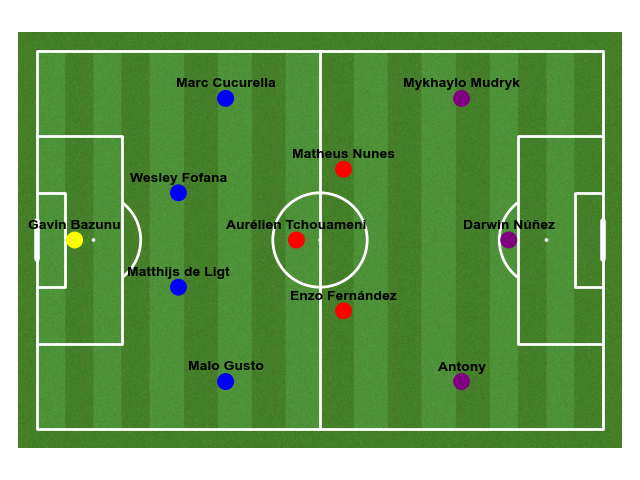

In [80]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)


fig, ax = pitch.draw()
point=pitch.scatter(x=top11_fee.x,y=top11_fee.y,color=top11_fee.colors, label=top11_fee.name, ax=ax, s=125) # plotting single point

for index, row in top11_fee.iterrows():
    pitch.annotate(row["name"], xy=(row.x, row.y-3), c='black', va='center',
                   ha='center', size=10, weight='bold', ax=ax)
    
plt.show()